In [2]:
import dalex as dx
import xgboost
import lime

import sklearn

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("SpeedDating.csv")
variables = data.drop([data.columns[0], 'TARGET'], axis=1)
target = data['TARGET']

variables

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0
2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0
3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0
4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0
1044,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0
1045,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0
1046,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0


In [6]:
from sklearn.model_selection import train_test_split

v_train, v_test, t_train, t_test = train_test_split(variables, target, random_state=69, test_size=0.2)

def use_model(model):
    model.fit(v_train, t_train)
    explainer = dx.Explainer(model, variables, target)
    return explainer

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()

gex = use_model(gradient)
gex.model_performance(cutoff=target.mean())

Preparation of a new explainer is initiated

  -> data              : 1048 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1048 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001ED19D80900> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00233, mean = 0.179, max = 0.982
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.847, mean = -0.0019, max = 0.982
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
GradientBoostingClassifier,0.913978,0.590278,0.7173,0.872137,0.956465


In [32]:
indices = [2, 5, 9]
observations = variables.iloc[indices]
gex.predict(observations)

array([0.75663652, 0.02518707, 0.05715338])

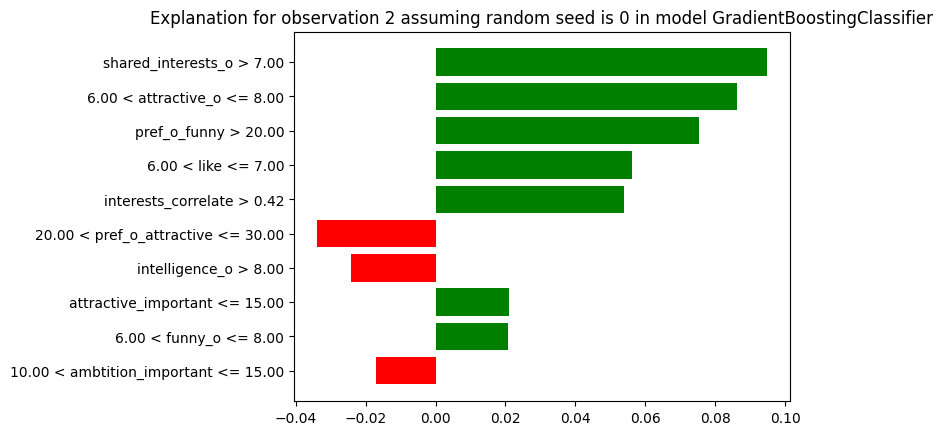

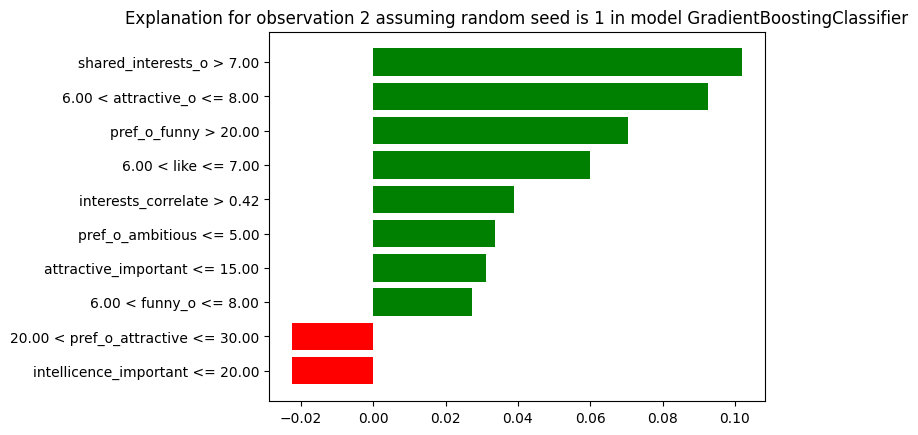

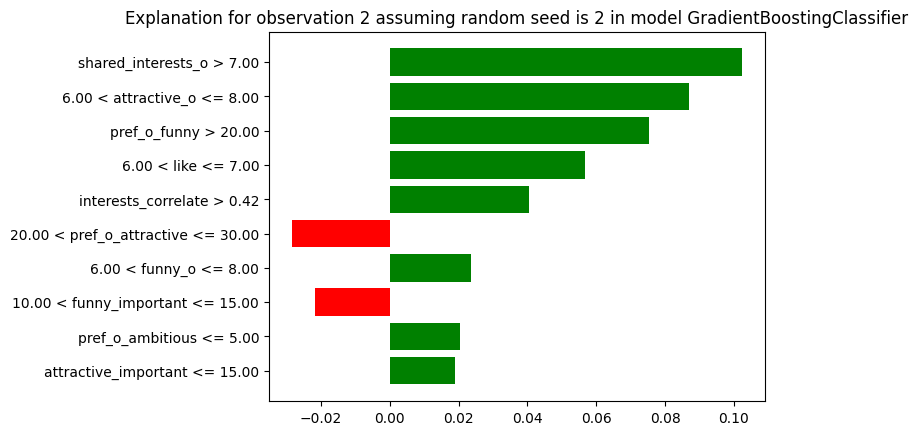

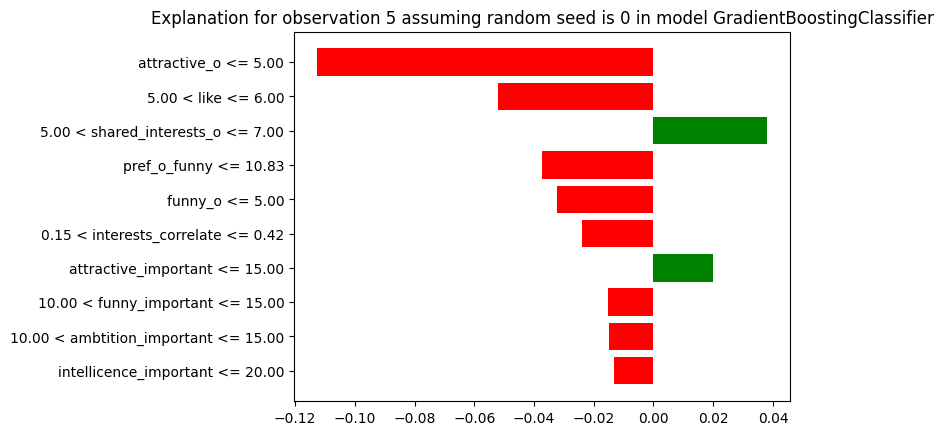

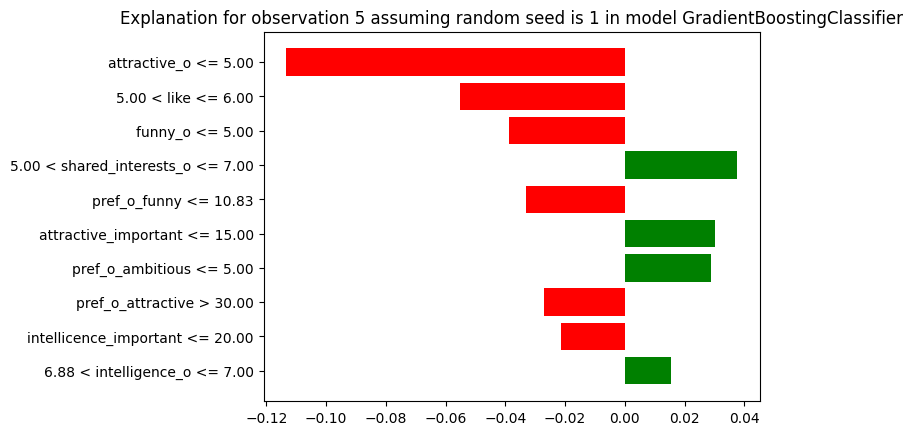

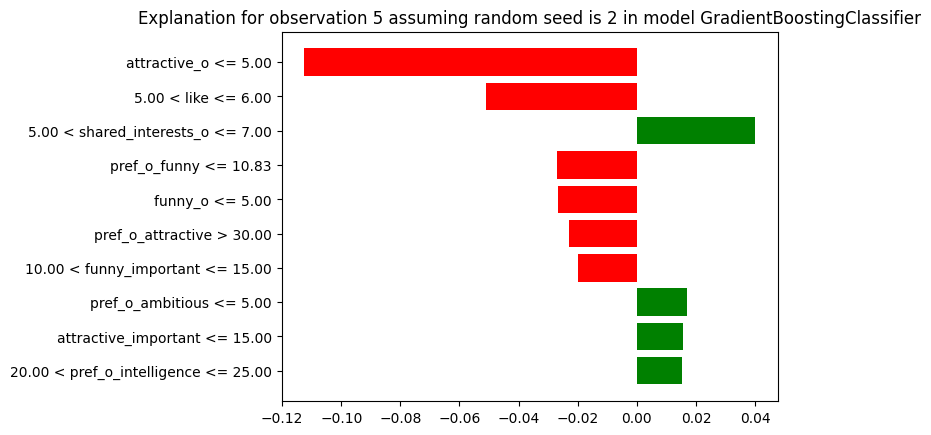

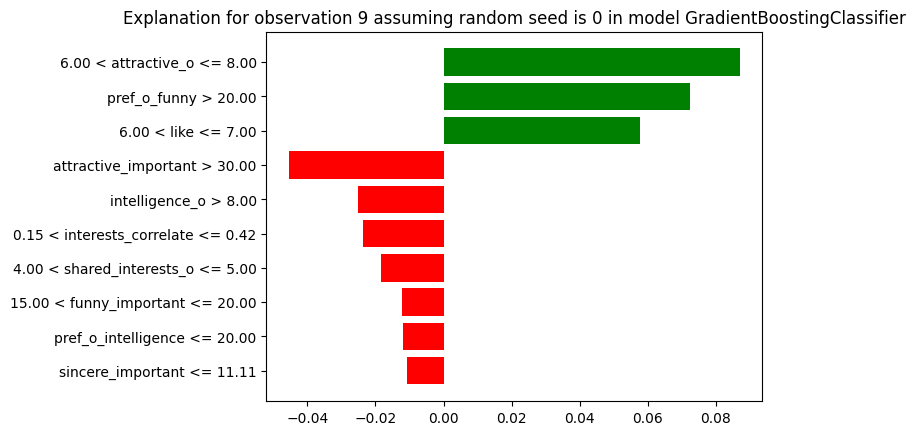

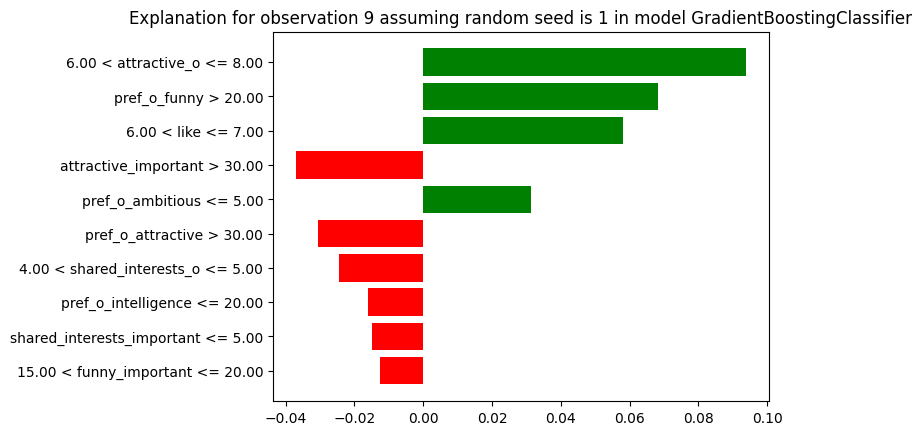

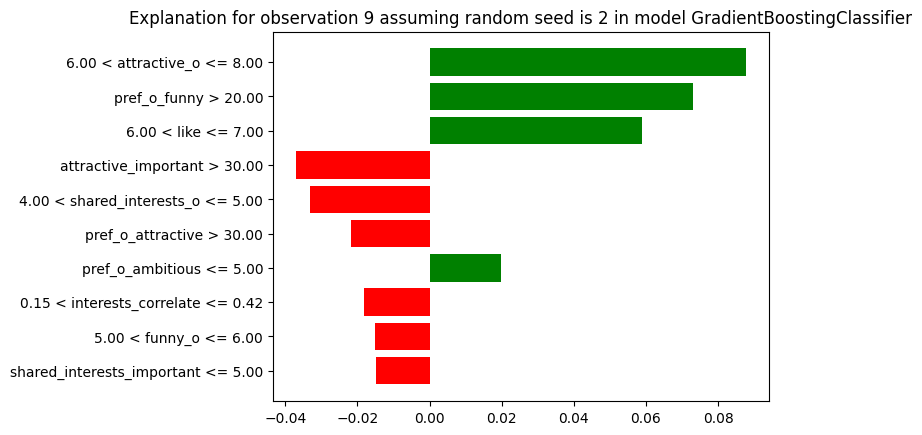

In [34]:
import random
from matplotlib import pyplot as plt

iters = 3
for id, observation in zip(indices, observations.values):
    for iter in range(iters):
        random.seed(iter)
        np.random.seed(iter)
        exp = gex.predict_surrogate(observation)
        exp.plot(return_figure=True)
        plt.title(f'Explanation for observation {id} assuming random seed is {iter} in model GradientBoostingClassifier')

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

fex = use_model(forest)
fex.model_performance(cutoff=target.mean())

Preparation of a new explainer is initiated

  -> data              : 1048 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1048 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001ED19D80900> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.186, max = 0.95
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.8, mean = -0.00821, max = 0.96
  -> model_info        : package sklearn

A new explainer has been created!


,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.951613,0.683398,0.795506,0.913168,0.977266


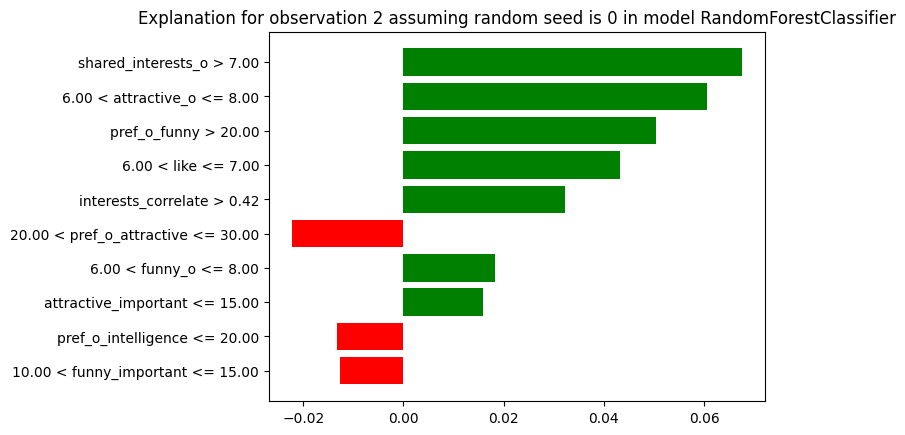

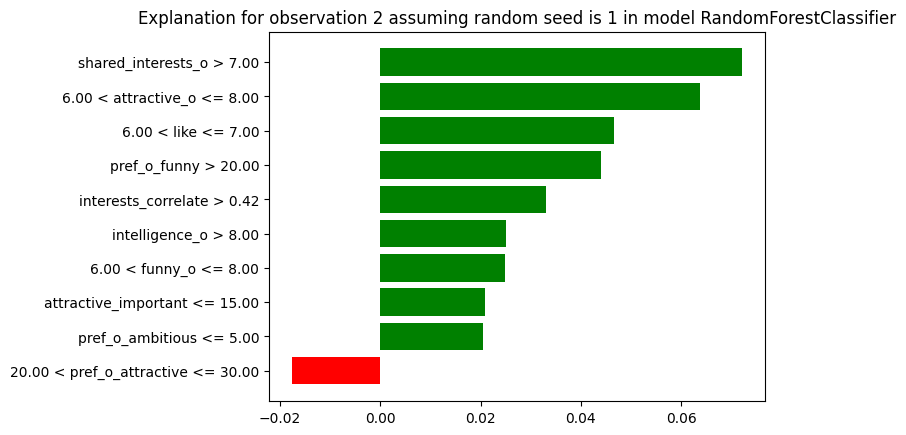

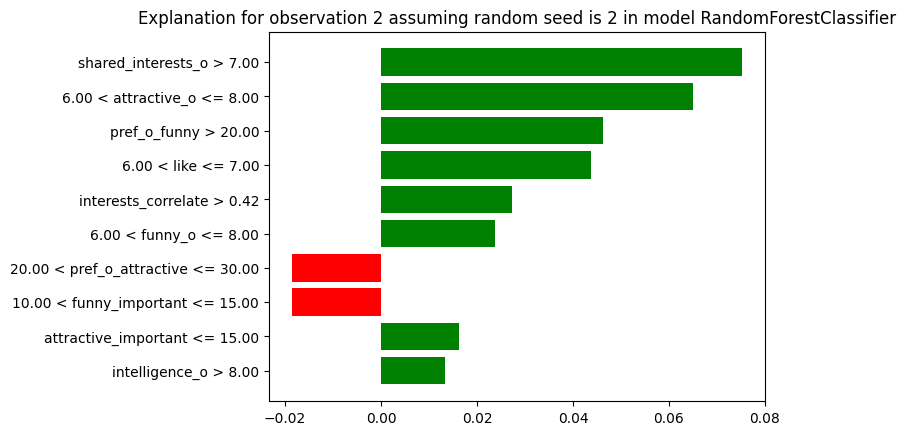

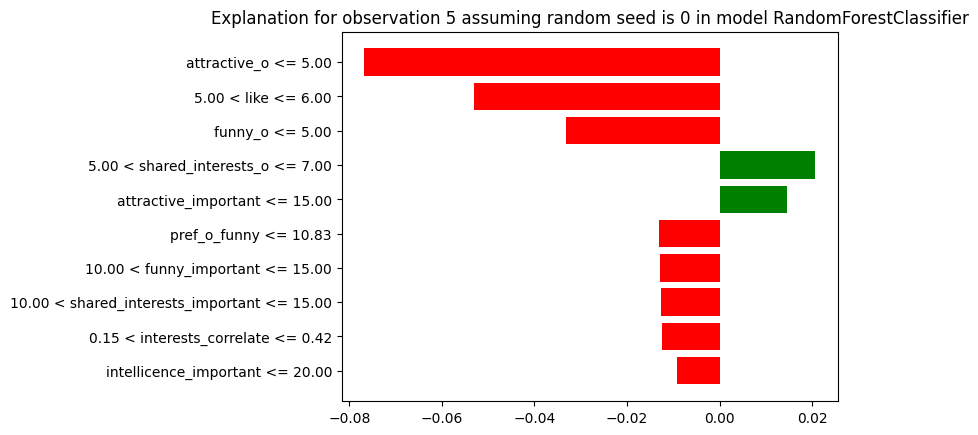

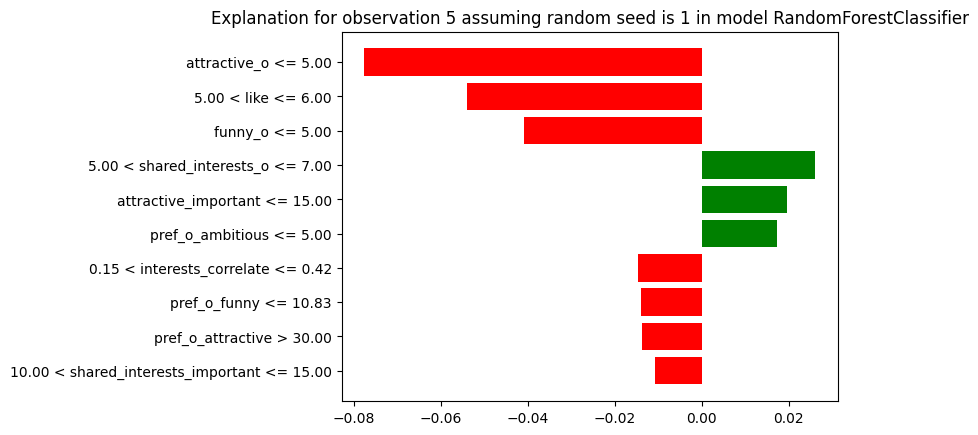

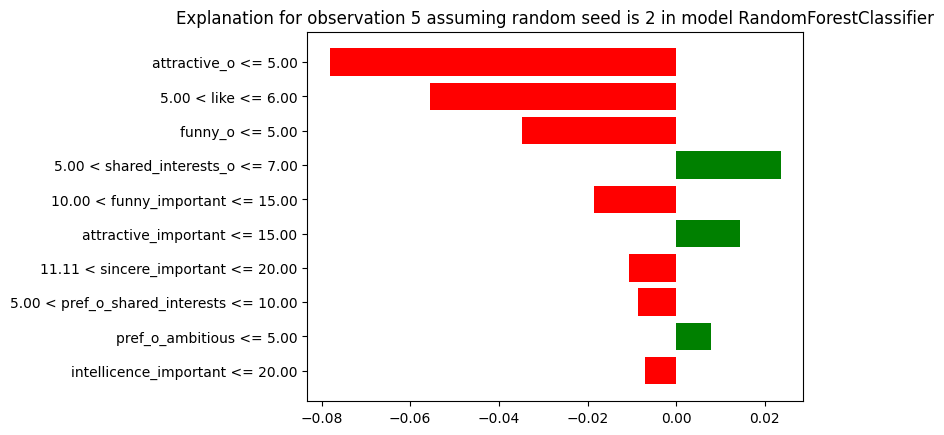

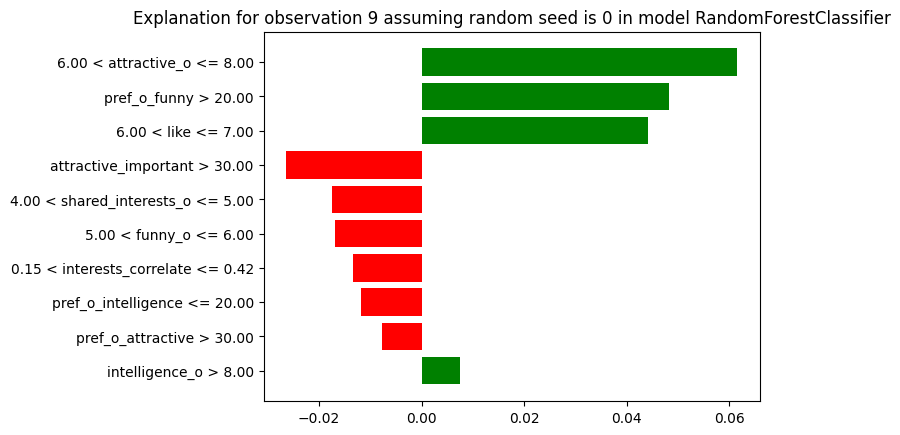

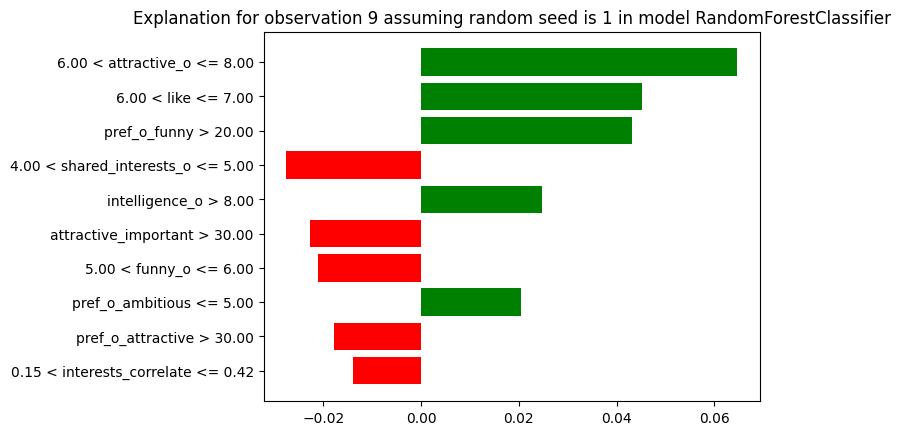

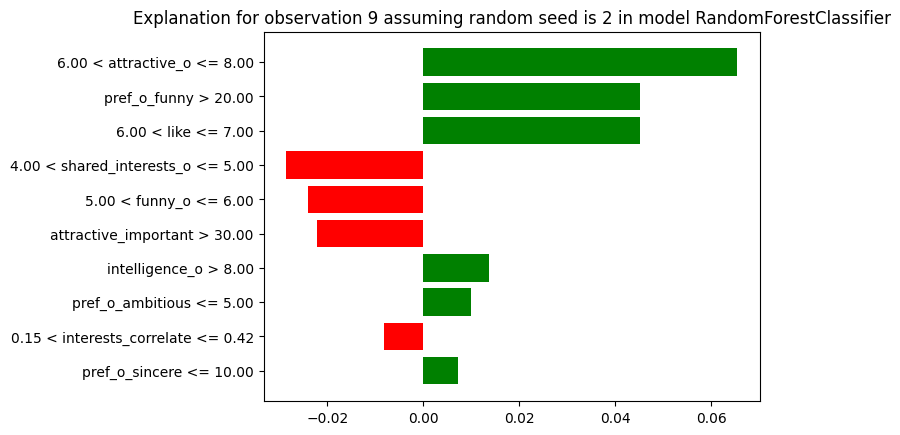

In [35]:
iters = 3
for id, observation in zip(indices, observations.values):
    for iter in range(iters):
        random.seed(iter)
        np.random.seed(iter)
        exp = fex.predict_surrogate(observation)
        exp.plot(return_figure=True)
        plt.title(f'Explanation for observation {id} assuming random seed is {iter} in model RandomForestClassifier')